<a href="https://colab.research.google.com/github/EdoFA12/PraktikumTransformasiCitra/blob/main/PraktikumTransformasiCitra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ahamd Firdausyah Akbar

Nim : 2221400143


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


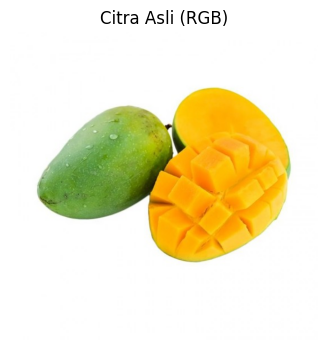

In [ ]:
## Import library yang di butuhkan transformasi citra
import cv2
import numpy as np
from matplotlib import pyplot as plt

file_citra = '/content/drive/MyDrive/manggakura2.jpg'

try:
    citra_warna = cv2.imread(file_citra, cv2.IMREAD_COLOR)

    if citra_warna is None:
        raise FileNotFoundError(f"Error: Citra tidak ditemukan atau tidak dapat dimuat: {file_citra}")

    citra_rgb = cv2.cvtColor(citra_warna, cv2.COLOR_BGR2RGB)

except FileNotFoundError as e:
    print(e)
    citra_rgb = np.zeros((100, 100, 3), dtype=np.uint8)
    print("Menggunakan citra hitam dummy. Silakan unggah dan ganti nama file.")

#Menampilkan Citra Asli
plt.figure(figsize=(8, 4))
plt.imshow(citra_rgb)
plt.title('Citra Asli (RGB)')
plt.axis('off')
plt.show()


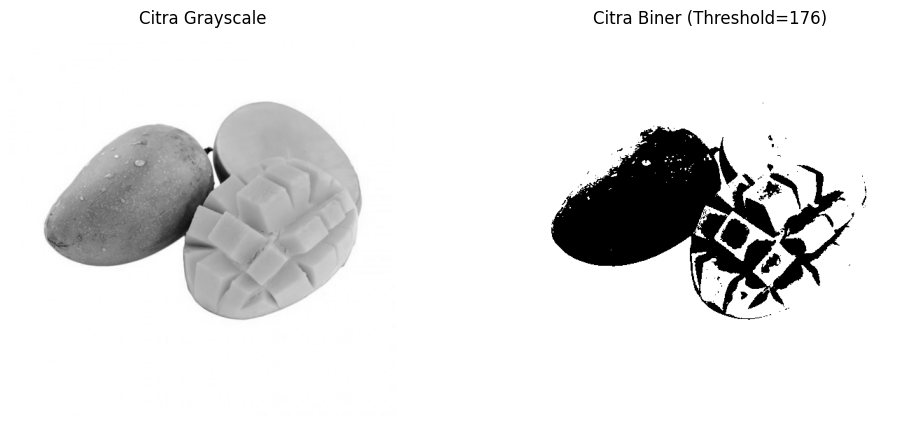

In [ ]:
#1. PENGOLAHAN CITRA DASAR: Konversi Grayscale & Biner
citra_gray = cv2.cvtColor(citra_warna, cv2.COLOR_BGR2GRAY)

T = 176
(T_val, citra_biner) = cv2.threshold(citra_gray, T, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(citra_gray, cmap='gray')
plt.title('Citra Grayscale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(citra_biner, cmap='gray')
plt.title(f'Citra Biner (Threshold={T})')
plt.axis('off')
plt.show()

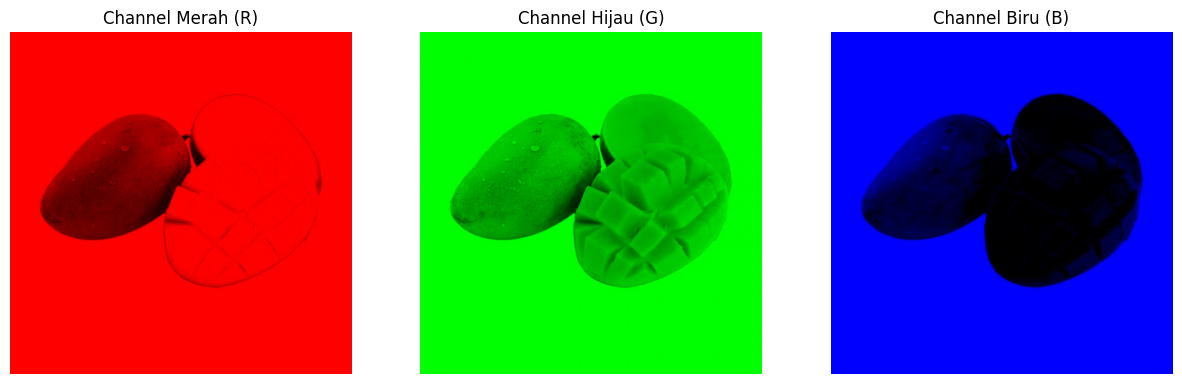

In [ ]:
# 1. PENGOLAHAN CITRA DASAR: Pemisahan Channel RGB

(B, G, R) = cv2.split(citra_warna)
zeros = np.zeros(citra_gray.shape, dtype=citra_warna.dtype)

citra_R = cv2.merge([zeros, zeros, R])

citra_G = cv2.merge([zeros, G, zeros])

citra_B = cv2.merge([B, zeros, zeros])

citra_R_rgb = cv2.cvtColor(citra_R, cv2.COLOR_BGR2RGB)
citra_G_rgb = cv2.cvtColor(citra_G, cv2.COLOR_BGR2RGB)
citra_B_rgb = cv2.cvtColor(citra_B, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(citra_R_rgb)
plt.title('Channel Merah (R)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(citra_G_rgb)
plt.title('Channel Hijau (G)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(citra_B_rgb)
plt.title('Channel Biru (B)')
plt.axis('off')

plt.show()

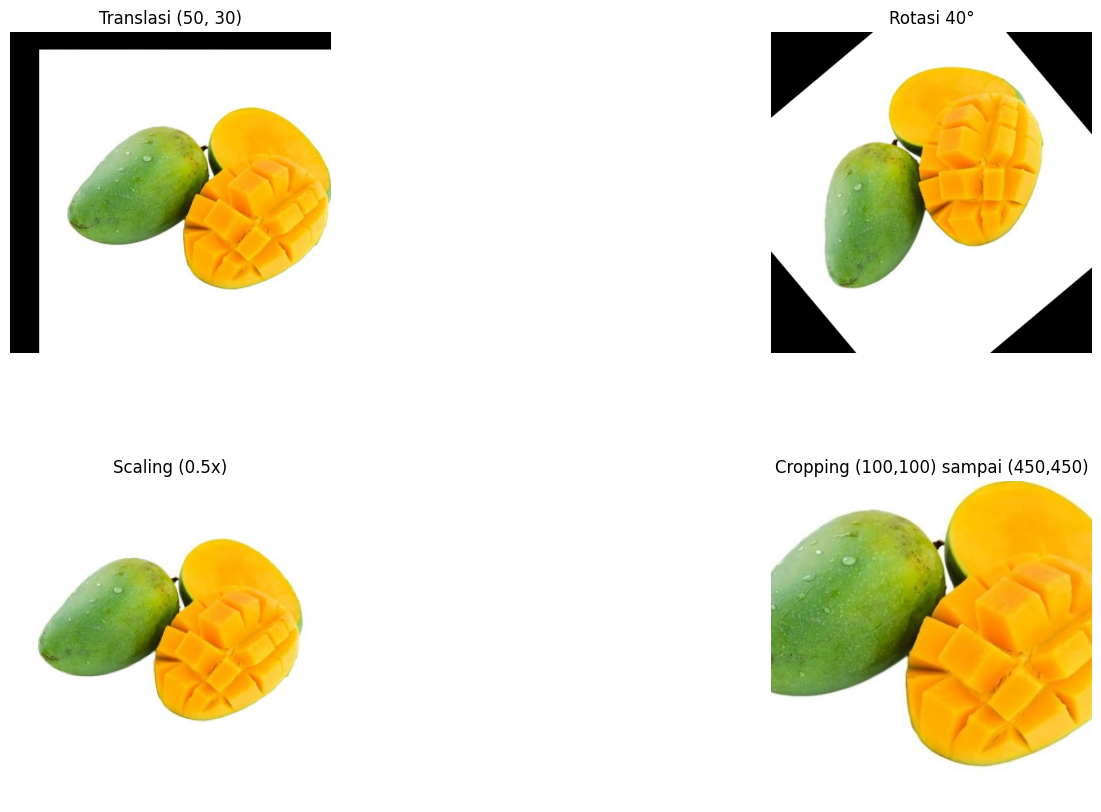

In [ ]:
#2. OPERASI GEOMETRI

(h, w) = citra_rgb.shape[:2]

plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.4)

# --- 2.1. Translasi (Pergeseran) ---
Tx = 50
Ty = 30
M_translasi = np.float32([[1, 0, Tx], [0, 1, Ty]])
citra_translasi = cv2.warpAffine(citra_rgb, M_translasi, (w, h))

plt.subplot(2, 2, 1)
plt.imshow(citra_translasi)
plt.title(f'Translasi ({Tx}, {Ty})')
plt.axis('off')


# --- 2.2. Rotasi (Perputaran) ---
sudut = 40
M_rotasi = cv2.getRotationMatrix2D((w // 2, h // 2), sudut, 1.0)
citra_rotasi = cv2.warpAffine(citra_rgb, M_rotasi, (w, h))

plt.subplot(2, 2, 2)
plt.imshow(citra_rotasi)
plt.title(f'Rotasi {sudut}°')
plt.axis('off')

# --- 2.3. Scaling (Penskalaan) ---
faktor_skala = 0.5
citra_scaling = cv2.resize(citra_rgb, (int(w * faktor_skala), int(h * faktor_skala)), interpolation=cv2.INTER_LINEAR)

plt.subplot(2, 2, 3)
plt.imshow(citra_scaling)
plt.title(f'Scaling ({faktor_skala}x)')
plt.axis('off')


# --- 2.4. Cropping (Pemotongan) ---
# Potong bagian citra dari koordinat (x1, y1) hingga (x2, y2)
x1, y1 = 100, 100
x2, y2 = w - 100, h - 100
citra_cropping = citra_rgb[y1:y2, x1:x2]

plt.subplot(2, 2, 4)
plt.imshow(citra_cropping)
plt.title(f'Cropping ({x1},{y1}) sampai ({x2},{y2})')
plt.axis('off')

plt.show()
